## Part 1: Regression on California Test Scores

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cts = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv')
cts.head(10)

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

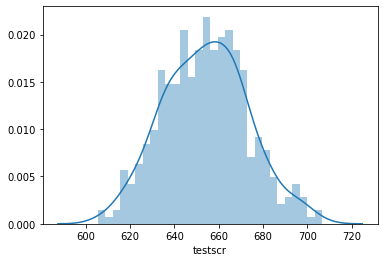

In [3]:
sns.distplot(cts['testscr'],bins=30)

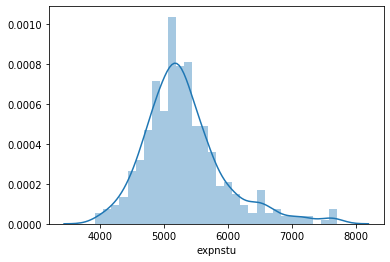

In [4]:
#choose "avginc", district average income, as one of the explanatory variables
sns.distplot(cts['expnstu'],bins=30)

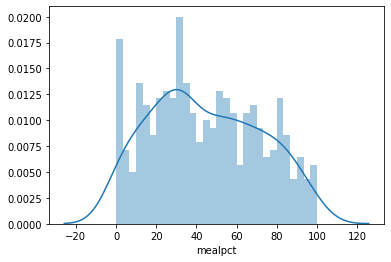

In [5]:
#choose "mealpct", percent qualifying for reduced-price lunch, as another of the explanatory variables
sns.distplot(cts['mealpct'],bins=30)

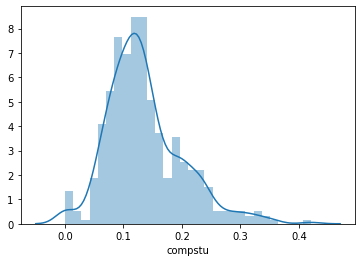

In [6]:
#choose "compstu", computer per student, as another of the explanatory variables
sns.distplot(cts['compstu'],bins=30)

### 1.2 Visualize the dependency of the target on each feature from 1.1.

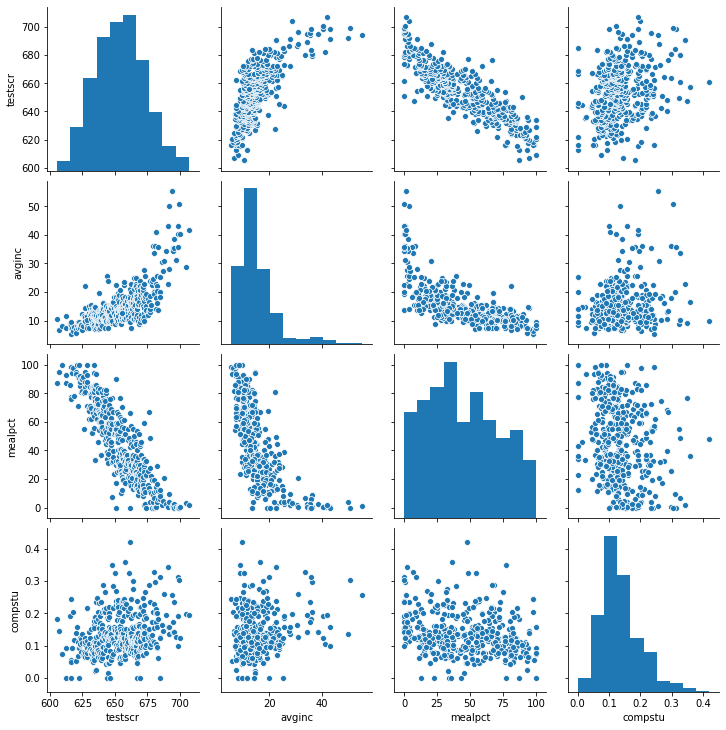

In [7]:
#use sns.pairplot to generate the correlation between each two variables simultaneously 
sns.pairplot(data=cts[['testscr','avginc','mealpct','compstu']])

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [9]:
#Split data in training and test set
cts1 = cts.iloc[:,5:-2]
y = cts1['testscr']
X = cts1.loc[:, cts1.columns != 'testscr']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
cts1.head(10)

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677
5,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759
6,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949
7,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461
8,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157
9,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921


##### *apply the models without preprocessing the data*

In [10]:
#predict X_test and y_test, show the accuracy of prediction
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
print("accuracy of KNN: {:.3f}".format(knn.score(X_test, y_test)))

lr = LinearRegression()
lr.fit(X_train,y_train)
print("accuracy of Linear Regression: {:.3f}".format(lr.score(X_test, y_test)))

ridge = Ridge(max_iter=10000)
ridge.fit(X_train,y_train)
print("accuracy of Ridge: {:.3f}".format(ridge.score(X_test, y_test)))

lasso = Lasso(max_iter=10000)
lasso.fit(X_train,y_train)
print("accuracy of Lasso: {:.3f}".format(lasso.score(X_test, y_test)))

accuracy of KNN: 0.085
accuracy of Linear Regression: 0.807
accuracy of Ridge: 0.807
accuracy of Lasso: 0.807


In [11]:
#Cross-Validation
print("Cross-Validation score of KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))
print("Cross-Validation score of Linear Regression: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train))))
print("Cross-Validation score of Ridge: {:.3f}".format(np.mean(cross_val_score(Ridge(max_iter=10000), X_train, y_train))))
print("Cross-Validation score of Lasso: {:.3f}".format(np.mean(cross_val_score(Lasso(max_iter=10000), X_train, y_train))))
      

Cross-Validation score of KNN: -0.054
Cross-Validation score of Linear Regression: 0.781
Cross-Validation score of Ridge: 0.783
Cross-Validation score of Lasso: 0.787


##### *preprocessing the data before apply the model*

In [12]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#predict X_test and y_test, show the accuracy of prediction
knn.fit(X_train_scaled,y_train)
print("accuracy of KNN: {:.3f}".format(knn.score(X_test_scaled, y_test)))

lr.fit(X_train_scaled,y_train)
print("accuracy of Linear Regression: {:.3f}".format(lr.score(X_test_scaled, y_test)))

ridge.fit(X_train_scaled,y_train)
print("accuracy of Ridge: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

lasso.fit(X_train_scaled,y_train)
print("accuracy of Lasso: {:.3f}".format(lasso.score(X_test_scaled, y_test)))

accuracy of KNN: 0.769
accuracy of Linear Regression: 0.807
accuracy of Ridge: 0.807
accuracy of Lasso: 0.786


In [14]:
#Cross-Validation
print("Cross-Validation score of KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train))))
print("Cross-Validation score of Linear Regression: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))))
print("Cross-Validation score of Ridge: {:.3f}".format(np.mean(cross_val_score(Ridge(), X_train_scaled, y_train))))
print("Cross-Validation score of Lasso: {:.3f}".format(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train))))

Cross-Validation score of KNN: 0.711
Cross-Validation score of Linear Regression: 0.781
Cross-Validation score of Ridge: 0.783
Cross-Validation score of Lasso: 0.784


#### *Conclusion 1.3*

Scaling the data especially helps KNN Regression to improve its model accuracy, the accuracy of prediction increases from 0.08 to 0.77, and cross_validation R-squared increases from -0.05 to 0.77.
But it does not fluence significantly the accuracy of linear regression, ridge or lasso, the accuracy of prediction and cross_validation R-squared only change slightly.

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
#knn
param_grid = {'n_neighbors': np.arange(1, 50, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Regression: {:.3f}".format(grid_knn.best_score_))

#ridge
alpha = {'alpha': np.arange(1, 20, 1)}
grid_ridge = GridSearchCV(Ridge(),param_grid=alpha, cv=5)
grid_ridge.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Ridge Regression: {:.3f}".format(grid_ridge.best_score_))

#lasso
alpha_l = {'alpha': np.arange(0.01, 1, 0.01)}
grid_lasso = GridSearchCV(Lasso(),param_grid=alpha_l, cv=5)
grid_lasso.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Lasso Regression: {:.3f}".format(grid_lasso.best_score_))

best mean cross-validation score of KNN Regression: 0.721
best mean cross-validation score of Ridge Regression: 0.786
best mean cross-validation score of Lasso Regression: 0.788


#### *Conclusion 1.4*

GridSearchCV method can be applied to KNN, Ridge and Lasso regression. The cross-validation scores improve slightly : from 0.711 to 0.721 for KNN, from 0.783 to 0.786 for Ridge, from 0.784 to 0.788 for Lasso.

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [17]:
# Because the predictions of lasso and ridge are more accurate than that of linear regression, so I choose these two as my two best lienar models
print("grid_ridge.best_params_: {}".format(grid_ridge.best_params_))
print("grid_lasso.best_params_: {}".format(grid_lasso.best_params_))

grid_ridge.best_params_: {'alpha': 17}
grid_lasso.best_params_: {'alpha': 0.35000000000000003}


In [18]:
ridge_best = Ridge(alpha=17)
ridge_best.fit(X_train_scaled,y_train)
print("accuracy of Ridge: {:.3f}".format(ridge_best.score(X_test_scaled, y_test)))

lasso_best = Lasso(alpha=0.35)
lasso_best.fit(X_train_scaled,y_train)
print("accuracy of Lasso: {:.3f}".format(lasso_best.score(X_test_scaled, y_test)))

accuracy of Ridge: 0.802
accuracy of Lasso: 0.801


In [19]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Lasso_Coefs",lasso_best.coef_.transpose())
coef_table.insert(len(coef_table.columns),"Ridge_Coefs",ridge_best.coef_.transpose())
coef_table

,0,Lasso_Coefs,Ridge_Coefs
0,enrltot,-0.000000,-0.280604
1,teachers,-0.000000,-0.274729
2,calwpct,-0.718432,-1.863956
3,mealpct,-10.142608,-8.343486
4,computer,-0.000000,0.671629
5,compstu,0.000000,-0.009162
6,expnstu,0.903821,1.090739
7,str,-0.485221,-0.643642
8,avginc,3.594506,3.990231
9,elpct,-3.127555,-3.933905


#### *Conclusion 1.5*

Both Lasso and Ridge agree on that mealpct, calwpct, expnstu, str, avginc, elpct are important.

### 1.6 Discuss which final model you would choose to predict new data

I'd choose Lasso as my final model for two reasons. First, it renders a good accuracy of prediction, better than knn and linear regression, just slight worse than Ridge (a difference of 0.01). Second, it has a better interpretability, because it disregards insignificant features, which makes the model easier to interprete and more clean. In a model with a lot of insignificant features, it is more suitable than Ridge Regression.

## Part 2: Classification on red and white wine characteristics

In [20]:
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")

In [21]:
white['winetype'] = 0
red['winetype'] = 1

In [22]:
wine = pd.concat([white,red])

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   



In [23]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


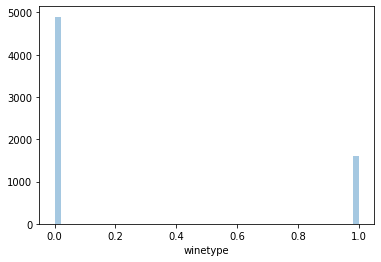

In [24]:
sns.distplot(wine['winetype'],kde=False)

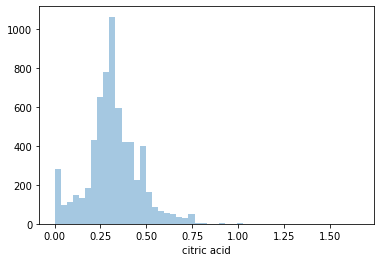

In [25]:
sns.distplot(wine['citric acid'],kde=False)

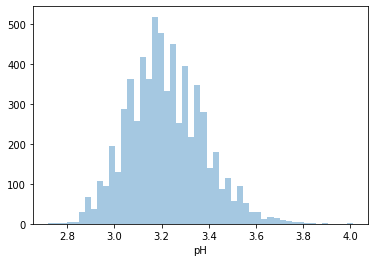

In [26]:
sns.distplot(wine['pH'],kde=False)

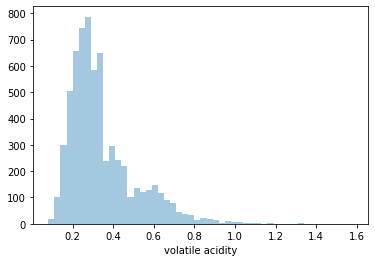

In [27]:
sns.distplot(wine['volatile acidity'],kde=False)

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [28]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0


In [29]:
X = wine.iloc[:,0:12]
y = wine.iloc[:,-1]

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

##### without preprocessing the data

In [32]:
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
print("accuracy of KNN: {:.3f}".format(knnc.score(X_test,y_test)))

logit = LogisticRegression(penalty='none', max_iter=1000000)
logit.fit(X_train,y_train)
print("accuracy of Logistic Regression without penalty: {:.3f}".format(logit.score(X_test,y_test)))

logit_penalty = LogisticRegression(penalty='l2', max_iter=10000)
logit_penalty.fit(X_train,y_train)
print("accuracy of Logistic Regression with penalty: {:.3f}".format(logit_penalty.score(X_test,y_test)))

accuracy of KNN: 0.936
accuracy of Logistic Regression without penalty: 0.993
accuracy of Logistic Regression with penalty: 0.981


In [33]:
#Cross-Validation
print("Cross-Validation score of KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))
print("Cross-Validation score of Logistic Regression without penalty: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X_train, y_train))))
print("Cross-Validation score of Logistic Regression with penalty: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2', max_iter=10000), X_train, y_train))))

Cross-Validation score of KNN: 0.942
Cross-Validation score of Logistic Regression without penalty: 0.989
Cross-Validation score of Logistic Regression with penalty: 0.986


##### preprocessing the data before regression

In [34]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
knnc = KNeighborsClassifier()
knnc.fit(X_train_scaled,y_train)
print("accuracy of KNN: {:.3f}".format(knnc.score(X_test_scaled,y_test)))

logit = LogisticRegression(penalty='none', max_iter=10000)
logit.fit(X_train_scaled,y_train)
print("accuracy of Logistic Regression without penalty: {:.3f}".format(logit.score(X_test_scaled,y_test)))

logit_penalty = LogisticRegression(penalty='l2', max_iter=10000)
logit_penalty.fit(X_train_scaled,y_train)
print("accuracy of Logistic Regression with penalty: {:.3f}".format(logit_penalty.score(X_test_scaled,y_test)))

accuracy of KNN: 0.991
accuracy of Logistic Regression without penalty: 0.993
accuracy of Logistic Regression with penalty: 0.991


In [36]:
#Cross-Validation
print("Cross-Validation score of KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train))))
print("Cross-Validation score of Logistic Regression without penalty: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter=10000), X_train_scaled, y_train))))
print("Cross-Validation score of Logistic Regression with penalty: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2', max_iter=10000), X_train_scaled, y_train))))


Cross-Validation score of KNN: 0.993
Cross-Validation score of Logistic Regression without penalty: 0.994
Cross-Validation score of Logistic Regression with penalty: 0.993


#### conclusion 2.2

Scaling the data increase the cross-validation score of all three methods, especially KNN: from 0.942 to 0.993. As for logistic regression with or without penalty, the increase is slight.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [37]:
#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))

#logit with penalty
C = {'C': np.arange(1, 20, 0.5)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))

best mean cross-validation score of KNN Classifier: 0.994
best mean cross-validation score of Logistic Regression: 0.994


#### conclusion 2.3

The cross-validation scores of KNN and Logistic Regression with penalty just increase slightly after using GridSearchCV, both from 0.993 to 0.994

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [38]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [39]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)
kfold = KFold(n_splits=10, shuffle = True, random_state=42)
#kfold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=kfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

print('----------------stratified k-fold is applied below--------------')

#stratified k-fold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

best mean cross-validation score of KNN Classifier: 0.995
best parameter of KNN Classifier: {'n_neighbors': 2}
best mean cross-validation score of Logistic Regression: 0.994
best parameter of Logistic Regression: {'C': 2.8000000000000003}
----------------stratified k-fold is applied below--------------
best mean cross-validation score of KNN Classifier: 0.994
best parameter of KNN Classifier: {'n_neighbors': 2}
best mean cross-validation score of Logistic Regression: 0.994
best parameter of Logistic Regression: {'C': 2.8000000000000003}


###### Change the random seed of shuffling from 42 to 7

In [40]:
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)
kfold = KFold(n_splits=10, shuffle = True, random_state=7)

#kfold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=kfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

print('----------------stratified k-fold is applied below----------------')

#stratified k-fold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

best mean cross-validation score of KNN Classifier: 0.994
best parameter of KNN Classifier: {'n_neighbors': 6}
best mean cross-validation score of Logistic Regression: 0.993
best parameter of Logistic Regression: {'C': 3.2}
----------------stratified k-fold is applied below----------------
best mean cross-validation score of KNN Classifier: 0.995
best parameter of KNN Classifier: {'n_neighbors': 6}
best mean cross-validation score of Logistic Regression: 0.994
best parameter of Logistic Regression: {'C': 1.5000000000000002}


##### change the random state of the split into training and test data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#kfold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=kfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

print('----------------stratified k-fold is applied below--------------')

#stratified k-fold

#knn
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knnc = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid_knnc.fit(X_train_scaled, y_train)
print("best mean cross-validation score of KNN Classifier: {:.3f}".format(grid_knnc.best_score_))
print("best parameter of KNN Classifier: {}".format(grid_knnc.best_params_))

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train)
print("best mean cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))

best mean cross-validation score of KNN Classifier: 0.993
best parameter of KNN Classifier: {'n_neighbors': 4}
best mean cross-validation score of Logistic Regression: 0.993
best parameter of Logistic Regression: {'C': 3.6}
----------------stratified k-fold is applied below--------------
best mean cross-validation score of KNN Classifier: 0.993
best parameter of KNN Classifier: {'n_neighbors': 4}
best mean cross-validation score of Logistic Regression: 0.993
best parameter of Logistic Regression: {'C': 1.6}


#### Conclusion 2.4

Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? 
##### yes

Do they change if you change the random seed of the shuffling? 
##### yes

Or if you change the random state of the split into training and test data?
##### yes

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [42]:
# reset random state first
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# stratified k-fold renders more balanced data, so I choose stratified k-fold cross-validation to get the best
# parameter for Penalized Logistic Regression with GridsearchCV

#logit with penalty
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train)
print("best parameter of Penalized Logistic Regression: {}".format(grid_logit.best_params_))


best parameter of Penalized Logistic Regression: {'C': 1.5000000000000002}


0.9938427811626889

In [51]:
penalty_logit = LogisticRegression(C = 1.5, max_iter=10000)
penalty_logit.fit(X_train_scaled,y_train)
print("accuracy of Logistic Regression with penalty: {:.3f}".format(penalty_logit.score(X_test_scaled,y_test)))

logit = LogisticRegression(penalty='none', max_iter=10000)
logit.fit(X_train_scaled,y_train)
print("accuracy of Logistic Regression without penalty: {:.3f}".format(logit.score(X_test_scaled,y_test)))

np.mean(cross_val_score(LogisticRegression(C = 1.5, max_iter=10000), X_train, y_train))
grid_logit.best_score_

accuracy of Logistic Regression with penalty: 0.991
accuracy of Logistic Regression without penalty: 0.993


0.9938427811626889

In [45]:
coef_table_logit = pd.DataFrame(list(X_train.columns)).copy()
coef_table_logit.insert(len(coef_table_logit.columns),"Logit_Coefs",logit.coef_.transpose())
coef_table_logit.insert(len(coef_table_logit.columns),"Penalized_Logit_Coefs",penalty_logit.coef_.transpose())
coef_table_logit

,0,Logit_Coefs,Penalized_Logit_Coefs
0,fixed acidity,-0.396933,0.220398
1,volatile acidity,1.155973,1.263583
2,citric acid,-0.464869,-0.375329
3,residual sugar,-5.603123,-3.913912
4,chlorides,0.759642,0.784414
5,free sulfur dioxide,1.435934,1.037639
6,total sulfur dioxide,-3.336956,-3.003770
7,density,5.750060,3.904121
8,pH,-0.288440,0.211660
9,sulphates,0.437953,0.598476


#### conclusion 2.5
I will choose Logistic Regression without penalty for two reason. First, Logistic Regression without penalty renders a slightly better prediction than penalized one. Second, the penalized logistic regression does not have an effective skrinkage effect, so its core advantage is not applicable in this case. Therefore, the logistic regression without penalty is more simple and renders equally good or even a little better result.